In [38]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "C:/Users/bvkka/Desktop/states_all.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file_to_load)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [39]:
dfstate_year =df[['PRIMARY_KEY','STATE','TOTAL_EXPENDITURE','YEAR']].dropna(axis=0,how='any')

In [40]:
dfstate_year=dfstate_year.drop_duplicates(subset=['PRIMARY_KEY'],keep=False)

In [41]:
df4 = dfstate_year
df4.head()

,PRIMARY_KEY,STATE,TOTAL_EXPENDITURE,YEAR
0,1992_ALABAMA,ALABAMA,2653798.0,1992
1,1992_ALASKA,ALASKA,972488.0,1992
2,1992_ARIZONA,ARIZONA,3401580.0,1992
3,1992_ARKANSAS,ARKANSAS,1743022.0,1992
4,1992_CALIFORNIA,CALIFORNIA,27138832.0,1992


In [91]:
df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE')
df4.head()

C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PRIMARY_KEY,STATE,TOTAL_EXPENDITURE,YEAR
0,1992_ALABAMA,ALABAMA,2653798.0,1992
1,1992_ALASKA,ALASKA,972488.0,1992
2,1992_ARIZONA,ARIZONA,3401580.0,1992
3,1992_ARKANSAS,ARKANSAS,1743022.0,1992
4,1992_CALIFORNIA,CALIFORNIA,27138832.0,1992


C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


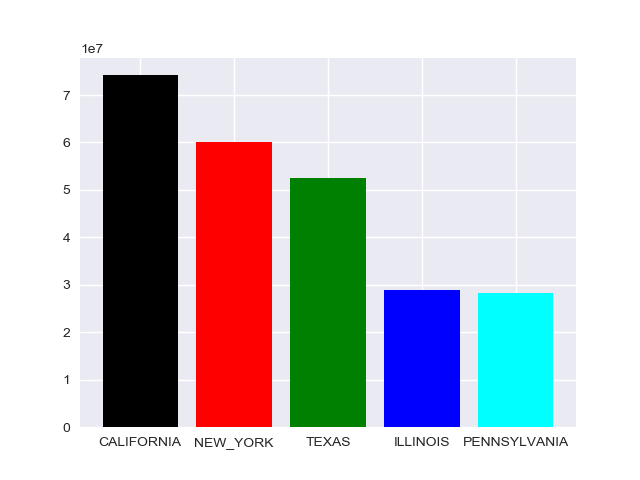

([<matplotlib.axis.XTick at 0x257772d43c8>,
 <a list of 5 Text xticklabel objects>)

In [89]:
df5=df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE').mean().sort_values(by=['TOTAL_EXPENDITURE']).iloc[:,0].nlargest(5)
import matplotlib.pyplot as plt
from matplotlib import cm as cmap   #color maps
import seaborn as sns
sns.set()
%matplotlib notebook
#plt.clf()
plt.figure()
plt.bar(np.arange(0,5,1),df5.values,color=['black', 'red', 'green', 'blue', 'cyan'])

#plt.bar(np.arange(0,5,1),df5.values,color = ['rgb(34,94,168)','rgb(65,182,196)','rgb(161,218,180)','rgb(255,255,204)'])



#plt.bar(np.arange(0,5,1),df5.values,sns.color_palette("Blues"))


plt.xticks(np.arange(0,5,1),df5.index.values)

C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


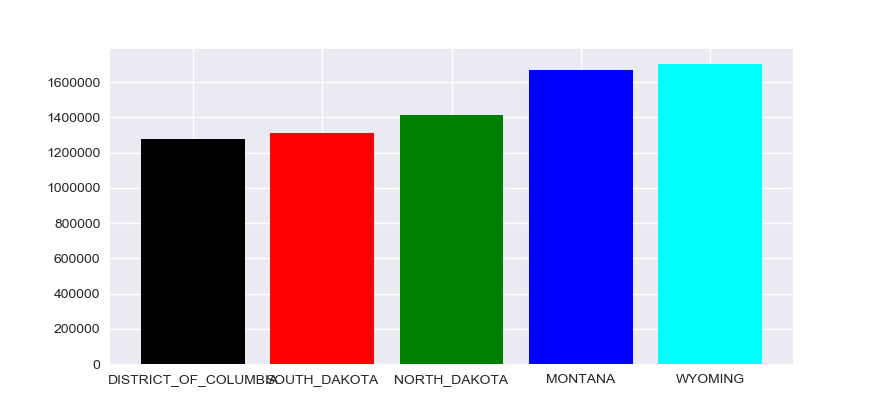

([<matplotlib.axis.XTick at 0x257770ebe80>,
 <a list of 5 Text xticklabel objects>)

In [87]:
df6=df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE').mean().sort_values(by=['TOTAL_EXPENDITURE']).iloc[:,0].nsmallest(5)
import matplotlib.pyplot as plt
from matplotlib import cm   #color maps
import seaborn as sns
sns.set()
%matplotlib notebook
#plt.clf()
plt.figure()
plt.bar(np.arange(0,5,1),df6.values,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(np.arange(0,5,1),df6.index.values)